In [186]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy import ndimage as ndi

# Harris Corner Detection #

## Step 1: To grayscale ##

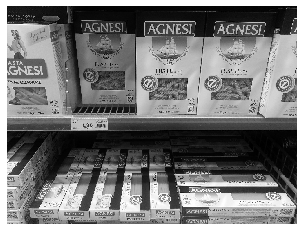

In [195]:
%matplotlib inline

imgTarget = imread('target1.png')
imgTargetGray = rgb2gray(imgTarget)

imgTemplate = imread('template1.png')
imgTemplateGray = rgb2gray(imgTemplate)

%matplotlib inline
plt.imshow(imgTargetGray, cmap="gray")
plt.axis("off")
plt.show()

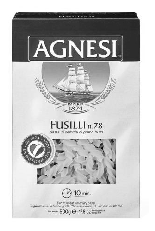

In [196]:
%matplotlib inline
plt.imshow(imgTemplateGray, cmap="gray")
plt.axis("off")
plt.show()

## Step 2: Image derivatives calculation (using Sobel filter) ##

In [208]:
# Derivative masks
hx = np.array([[1,0, -1],[2,0, -2],[1,0, -1]])
hy = hx.T

Ix_target = sig.convolve2d(imgTargetGray, hx, mode='same')
Iy_target = sig.convolve2d(imgTargetGray, hy, mode='same')

Ix_template = sig.convolve2d(imgTemplateGray, hx, mode='same')
Iy_template = sig.convolve2d(imgTemplateGray, hy, mode='same')

## Step 3: Smoothing squared image derivatives ##

In [232]:
# Parameter for Gaussian convolution in Harris Corner Detector
SIGMA_GAUSSIAN = 4

Ixx_target = ndi.gaussian_filter(Ix_target**2, sigma=SIGMA_GAUSSIAN)
Ixy_target = ndi.gaussian_filter(Iy_target*Ix_target, sigma=SIGMA_GAUSSIAN)
Iyy_target = ndi.gaussian_filter(Iy_target**2, sigma=SIGMA_GAUSSIAN)

Ixx_template = ndi.gaussian_filter(Ix_template**2, sigma=SIGMA_GAUSSIAN)
Ixy_template = ndi.gaussian_filter(Iy_template*Ix_template, sigma=SIGMA_GAUSSIAN)
Iyy_template = ndi.gaussian_filter(Iy_template**2, sigma=SIGMA_GAUSSIAN)

## Step 4: Computing Harris's corner measure ##

In [233]:
k = 0.04;

detA_target = Ixx_target*Iyy_target - Ixy_target**2
traceA_target = Ixx_target + Iyy_target

cim_target = detA_target - k * traceA_target ** 2

detA_template = Ixx_template*Iyy_template - Ixy_template**2
traceA_template = Ixx_template + Iyy_template

cim_template = detA_template - k * traceA_template ** 2

In [236]:
##  remove boundaries of cim which is going to have large values because of zero padding of the image

BORDER=20;
cim_target[1:BORDER,:]=0;
cim_target[len(cim_target)-BORDER:len(cim_target),:]=0;
cim_target[:,len(cim_target)-BORDER:len(cim_target)]=0;
cim_target[:,1:BORDER]=0;

cim_template[1:BORDER-15,:]=0;
cim_template[len(cim)-BORDER-15:len(cim),:]=0;
cim_template[:,len(cim)-BORDER-15:len(cim)]=0;
cim_template[:,1:BORDER-15]=0;

## Step 5: Non-maximum suppresion ##
    1. Edge: r < 0
    2. Corner: r > 0
    3. Flat: r = 0

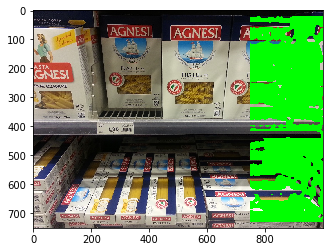

In [237]:
cornerList_target = []
corners_target = np.copy(imgTarget)
for rowindex, response in enumerate(cim_target):
    for colindex, r in enumerate(response):
        if r > 0:
            cornerList_target.append([rowindex, colindex, r])
            corners_target[rowindex, colindex] = [0,255,0]
                       
plt.imshow(corners_target)
plt.show()

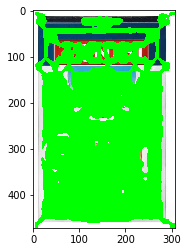

In [227]:
cornerList_template = []
corners_template = np.copy(imgTemplate)
for rowindex, response in enumerate(cim_template):
    for colindex, r in enumerate(response):
        if r > 0:
            cornerList_template.append([rowindex, colindex, r])
            corners_template[rowindex, colindex] = [0,255,0]
                       
plt.imshow(corners_template)
plt.show()